# Coupled Transmon / LC-oscillator (using the GUI)

## Imports

In [11]:
from Qcircuits import GUI
import numpy as np
import matplotlib.pyplot as plt
import os
blue =[0.483, 0.622, 0.974]
red = [0.931, 0.519, 0.406]

os.makedirs('circuits/', exist_ok=True)
with open('circuits/transmon_LC_GUI.txt','w') as f:
    f.write("""C;0,-1;1,-1;1.000000e-15;
C;-1,0;-1,-1;1.000000e-13;
J;0,0;0,-1;;L_J
W;-1,0;0,0;;
W;-1,-1;0,-1;;
C;1,0;1,-1;1.000000e-13;
L;2,0;2,-1;1.000000e-08;
W;1,0;2,0;;
W;1,-1;2,-1;;
G;2,1;2,0;;
G;-1,1;-1,0;;
R;3,0;3,-1;1.000000e+06;
W;2,0;3,0;;
W;2,-1;3,-1;;
""")

## Using the GUI

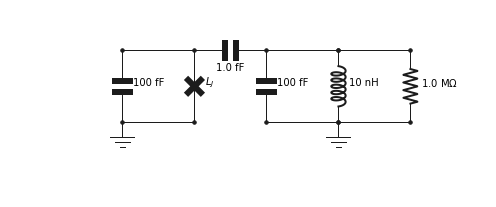

C 1 2 1.0 fF
C 0 1 100 fF
J 0 1 L_J
C 0 2 100 fF
L 0 2 10 nH
R 0 2 1.0 MOhm




In [13]:

# Construct the circuit
c = GUI('circuits/transmon_LC_GUI.txt', edit=True, plot=True, print_network=True)

In [3]:
# compute hamiltonian parameters on resonance
w,k,A,chi = c.w_k_A_chi(L_J = 10e-9,pretty_print=True)

    mode |  freq.  |  diss.  |  anha.  |
       0 | 5.0 GHz | 390 kHz |  47 MHz |
       1 | 5.0 GHz | 398 kHz |  48 MHz |

Kerr coefficients
(diagonal = Kerr, off-diagonal = cross-Kerr)
    mode |    0    |    1    |
       0 |  47 MHz |         |
       1 |  96 MHz |  48 MHz |



In [4]:
# compute hamiltonian parameters off resonance
w,k,A,chi = c.w_k_A_chi(L_J =  9e-9,pretty_print=True)

    mode |  freq.  |  diss.  |  anha.  |
       0 | 5.0 GHz | 780 kHz |  13 kHz |
       1 | 5.3 GHz | 7.5 kHz | 189 MHz |

Kerr coefficients
(diagonal = Kerr, off-diagonal = cross-Kerr)
    mode |    0    |    1    |
       0 |  13 kHz |         |
       1 | 3.1 MHz | 189 MHz |



In [5]:
# compute hamiltonian parameters for an array of L_J
L_J_list = np.linspace(11e-9,9e-9)
w,k,A,chi = c.w_k_A_chi(L_J = L_J_list)

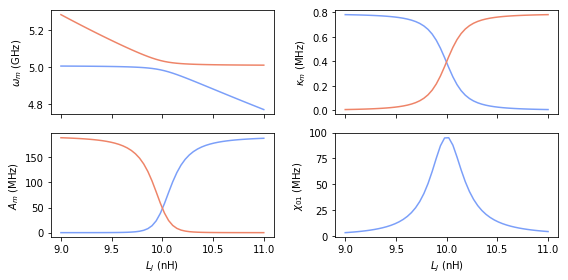

In [10]:
mode_0_color= blue
mode_1_color = red

fig,ax = plt.subplots(2,2,sharex = True,figsize = (8,4))
ax[0][0].plot(L_J_list*1e9,w[0]/1e9,label = 'mode #0',color = mode_0_color)
ax[0][0].plot(L_J_list*1e9,w[1]/1e9,label = 'mode #1',color = mode_1_color)
ax[0][0].set_ylabel('$\omega_m$ (GHz)')


ax[0][1].plot(L_J_list*1e9,k[0]/1e6,color = mode_0_color)
ax[0][1].plot(L_J_list*1e9,k[1]/1e6,color = mode_1_color)
ax[0][1].set_ylabel('$\kappa_m$ (MHz)')

ax[1][0].plot(L_J_list*1e9,A[0]/1e6,color = mode_0_color)
ax[1][0].plot(L_J_list*1e9,A[1]/1e6,color = mode_1_color)
ax[1][0].set_ylabel('$A_m$ (MHz)')

ax[1][1].plot(L_J_list*1e9,chi[0][1]/1e6,color = mode_0_color)
ax[1][1].set_ylabel('$\chi_{01}$ (MHz)')

ax[1][0].set_xlabel('$L_J$ (nH)')
ax[1][1].set_xlabel('$L_J$ (nH)')

# ax[0][0].legend(loc=(0.6,0.6),fontsize=8,frameon = False,handletextpad  = 0.5)
plt.tight_layout()
plt.show()

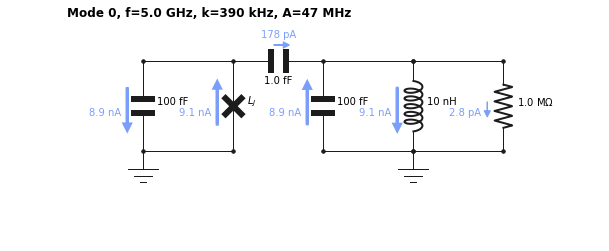

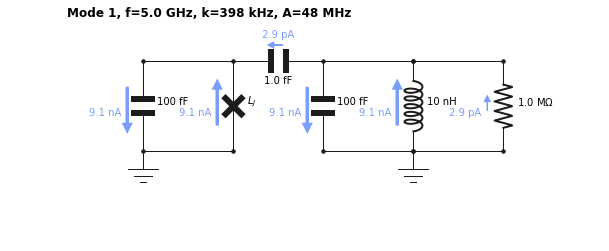

In [7]:
unit = 'current'
c.show_normal_mode(mode=0,unit=unit, L_J = 10e-9,)
c.show_normal_mode(mode=1,unit=unit, L_J = 10e-9)

In [8]:
H = c.hamiltonian(L_J = 10e-9)#, modes = 'all', junction_expansion = 6, photons = 10)
eigenvals, eigenstates = H.eigenstates()
print ("f- = %.2f GHz (from hamiltonian)"%(np.absolute(eigenvals[1]-eigenvals[0])/1e9))
print ("f+ = %.2f GHz (from hamiltonian)"%(np.absolute(eigenvals[2]-eigenvals[0])/1e9))

f- = 5.00 GHz (from hamiltonian)
f+ = 5.19 GHz (from hamiltonian)
